#Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Bangkok.txt', sep = "\t", names = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'] ,header=None)
df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0
...,...,...,...,...,...,...,...
40236,2021,6,1,16,15.6,0.0,0
40237,2021,6,1,16,15.6,0.0,0
40238,2021,6,1,16,15.6,0.0,0
40239,2021,6,1,16,15.6,0.0,0


In [3]:
#df = pd.read_csv('/content/drive/MyDrive/PM2.5 Project/Samut_Sakhon.txt', sep = "\t", names = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'] ,header=None)
#df

In [4]:
data = df.drop(columns=['PM10_mask', 'Retrospective'])
data

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
40236,2021,6,1,16,15.6
40237,2021,6,1,16,15.6
40238,2021,6,1,16,15.6
40239,2021,6,1,16,15.6


In [5]:
data.columns

Index(['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5'], dtype='object')

#Create Model

In [6]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split

In [7]:
y = data['PM2.5']
X = data[['Year', 'Month', 'Day', 'UTC Hour']]

In [8]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32192, 4) (8049, 4) (32192,) (8049,)


In [9]:
X_train.head

<bound method NDFrame.head of        Year  Month  Day  UTC Hour
6778   2016     12   26        16
30910  2020      2   17         0
18356  2018      6   12        17
20446  2018      9   11        16
20187  2018      8   31         2
...     ...    ...  ...       ...
8644   2017      3   24        11
21773  2018     11    8         0
21918  2018     11   14         6
33405  2020      6    3         0
8612   2017      3   23         3

[32192 rows x 4 columns]>

In [10]:
y_train.head

<bound method NDFrame.head of 6778     52.9
30910    19.2
18356    11.4
20446    19.3
20187    17.2
         ... 
8644     11.8
21773    24.6
21918    35.9
33405     9.1
8612     24.5
Name: PM2.5, Length: 32192, dtype: float64>

In [11]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (32192, 4)
y_train shape: (32192,)


In [12]:
print(X_train)

       Year  Month  Day  UTC Hour
6778   2016     12   26        16
30910  2020      2   17         0
18356  2018      6   12        17
20446  2018      9   11        16
20187  2018      8   31         2
...     ...    ...  ...       ...
8644   2017      3   24        11
21773  2018     11    8         0
21918  2018     11   14         6
33405  2020      6    3         0
8612   2017      3   23         3

[32192 rows x 4 columns]


In [13]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [14]:
n_steps = 1
n_features = 4
b_size = 100
look_back = 1

In [15]:
def trim_data(data, batch_size):
  """
  Trims out the extra data that does not fit into batches
  EX:
  dim, batch_size = 192, 50
  to
  dim, batch_size = 150, 50

  PARAMETERS
  ----------
  data: ndarray
    The data that you want to trim
  batch_size: int
    The batch size
  """
  extra = data.shape[0] % batch_size
  if (extra == 0):
    return data
  return data[:-extra]

In [16]:
X_train = trim_data(X_train, b_size)
y_train = trim_data(y_train, b_size)
X_test  = trim_data(X_test, b_size)
y_test  = trim_data(y_test, b_size)

In [17]:
assert X_train.shape[0] == y_train.shape[0], "Train dimension mismatch"
assert X_test.shape[0] == y_test.shape[0], "Test dimension mismatch"

In [18]:
print(X_train)

[[2016   12   26   16]
 [2020    2   17    0]
 [2018    6   12   17]
 ...
 [2018    1    6    8]
 [2021    6    1   16]
 [2017    8   15   21]]


In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32100, 4) (8000, 4) (32100,) (8000,)


In [20]:
X_train_len = X_train.shape[0]
X_test_len = X_test.shape[0]
y_train_len = y_train.shape[0]
y_test_len = y_test.shape[0]

In [21]:
X_train = X_train.reshape(X_train_len, n_steps, n_features)
X_test  = X_test.reshape(X_test_len, n_steps, n_features)

In [22]:
print(X_train)

[[[2016   12   26   16]]

 [[2020    2   17    0]]

 [[2018    6   12   17]]

 ...

 [[2018    1    6    8]]

 [[2021    6    1   16]]

 [[2017    8   15   21]]]


#Apply Model

In [23]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow.keras.models import load_model, Model 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Input, Flatten, Dropout, InputLayer
from keras.layers import LSTM, Activation
from keras.preprocessing.sequence import pad_sequences

from statsmodels.tools.eval_measures import rmse
from tabulate import tabulate

##Basic LSTM

In [24]:
###Basic LSTM###
basic_model = Sequential()
basic_model.add(LSTM(200, batch_input_shape=(b_size, n_steps, n_features), name="LSTMLayer"))
basic_model.add(Dense(1, name="OutputLayer"))
basic_model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [25]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
basic_model.fit(X_train, y_train, batch_size=b_size, epochs=1000, callbacks=[checkpoint], verbose=1)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 2s 2ms/step - loss: 453.7155 - accuracy: 0.0000e+00
Epoch 2/1000
321/321 [==============================] - 1s 2ms/step - loss: 237.4592 - accuracy: 0.0000e+00
Epoch 3/1000
321/321 [==============================] - 1s 2ms/step - loss: 188.4109 - accuracy: 0.0000e+00
Epoch 4/1000
321/321 [==============================] 

In [26]:
basic_model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 1ms/step - loss: 179.9710 - accuracy: 0.0000e+00


[179.97096252441406, 0.0]

In [27]:
prediction_result_basic = basic_model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Stack LSTM

In [28]:
###Stack LSTM###
s_model = Sequential()
s_model.add(LSTM(200, activation="relu", input_shape=(n_steps, n_features), return_sequences=True))
s_model.add(LSTM(200, activation="relu"))
s_model.add(Dense(1))
s_model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [29]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
s_model.fit(X_train, y_train, batch_size=b_size, epochs=1000, callbacks=[checkpoint], verbose=1)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 3s 4ms/step - loss: 187.0485 - accuracy: 0.0000e+00
Epoch 2/1000
321/321 [==============================] - 1s 4ms/step - loss: 181.7508 - accuracy: 0.0000e+00
Epoch 3/1000
321/321 [==============================] - 1s 4ms/step - loss: 180.0928 - accuracy: 0.0000e+00
Epoch 4/1000
321/321 [==============================] 

In [30]:
s_model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 1ms/step - loss: 89.7030 - accuracy: 0.0000e+00


[89.70299530029297, 0.0]

In [31]:
prediction_result_stack = s_model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Vanilla LSTM

In [32]:
###Vanilla LSTM###
vmodel = Sequential()
vmodel.add(LSTM(200, activation="relu", input_shape=(n_steps, n_features)))
vmodel.add(Dense(1))
vmodel.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [33]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
vmodel.fit(X_train, y_train, batch_size=b_size, epochs=100, callbacks=[checkpoint], verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 1s 2ms/step - loss: 211.3896 - accuracy: 0.0000e+00
Epoch 2/100
321/321 [==============================] - 1s 2ms/step - loss: 180.6093 - accuracy: 0.0000e+00
Epoch 3/100
321/321 [==============================] - 1s 2ms/step - loss: 179.6346 - accuracy: 0.0000e+00
Epoch 4/100
321/321 [==============================] - 1s

In [34]:
vmodel.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 0s 1ms/step - loss: 106.1687 - accuracy: 0.0000e+00


[106.16873931884766, 0.0]

In [35]:
prediction_result_vanilla = vmodel.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Bidirectional LSTM

In [36]:
###Bidirectional LSTM###
bi_model = Sequential()
bi_model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(n_steps, n_features)))
bi_model.add(Dense(1))
bi_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [37]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
bi_model.fit(X_train, y_train, batch_size=b_size, epochs=100, callbacks=[checkpoint], verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 2s 3ms/step - loss: 202.3356 - accuracy: 0.0000e+00
Epoch 2/100
321/321 [==============================] - 1s 3ms/step - loss: 181.2488 - accuracy: 0.0000e+00
Epoch 3/100
321/321 [==============================] - 1s 3ms/step - loss: 180.4203 - accuracy: 0.0000e+00
Epoch 4/100
321/321 [==============================] - 1s

In [38]:
bi_model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 1ms/step - loss: 102.1035 - accuracy: 0.0000e+00


[102.10352325439453, 0.0]

In [39]:
prediction_result_bidirection = bi_model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##LSTM with attention

In [40]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install attention

Note: you may need to restart the kernel to use updated packages.


In [42]:

###Worst one right now###
from attention import Attention
###LSTM with Attention###
atmodel = tf.keras.models.Sequential()
atmodel.add(tf.keras.layers.LSTM(200, input_shape=(n_steps, n_features),
                    return_sequences=True))
atmodel.add(Attention(name='attention_weight'))
atmodel.add(tf.keras.layers.Dense(1, activation='relu'))
atmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])  

In [43]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
atmodel.fit(X_train, y_train, batch_size=b_size, epochs=100, callbacks=[checkpoint], verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 3s 3ms/step - loss: 211.2561 - accuracy: 0.0000e+00
Epoch 2/100
321/321 [==============================] - 1s 3ms/step - loss: 181.9738 - accuracy: 0.0000e+00
Epoch 3/100
321/321 [==============================] - 1s 3ms/step - loss: 182.0296 - accuracy: 0.0000e+00
Epoch 4/100
321/321 [==============================] - 1s

In [44]:
atmodel.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 1ms/step - loss: 179.8636 - accuracy: 0.0000e+00


[179.8635711669922, 0.0]

In [45]:
prediction_result_attention = atmodel.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##GRU

In [46]:
###GRU###Bad model
from keras.layers import GRU

gmodel = Sequential()
gmodel.add(GRU(200, input_shape = (n_steps, n_features), return_sequences = True))
gmodel.add(GRU(1, return_sequences = False))
gmodel.add(Activation('relu'))  
gmodel.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [47]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
gmodel.fit(X_train, y_train, batch_size=b_size, epochs=100, callbacks=[checkpoint], verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 3s 3ms/step - loss: 705.6749 - accuracy: 0.0000e+00
Epoch 2/100
321/321 [==============================] - 1s 3ms/step - loss: 705.1420 - accuracy: 0.0000e+00
Epoch 3/100
321/321 [==============================] - 1s 3ms/step - loss: 705.1270 - accuracy: 0.0000e+00
Epoch 4/100
321/321 [==============================] - 1s

In [48]:
gmodel.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 1ms/step - loss: 687.8481 - accuracy: 0.0000e+00


[687.8480834960938, 0.0]

In [49]:
prediction_result_gru = gmodel.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Evaluating the Model

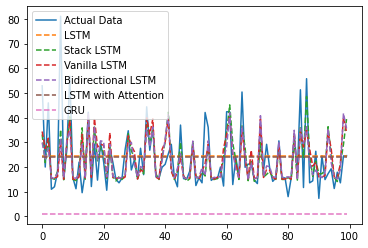

In [56]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
plt.plot(y_test[0:100], label= "Actual Data")
plt.plot(prediction_result_basic[0:100], label="LSTM",linestyle="--")
plt.plot(prediction_result_stack[0:100], label="Stack LSTM",linestyle="--")
plt.plot(prediction_result_vanilla[0:100], label="Vanilla LSTM",linestyle="--")
plt.plot(prediction_result_bidirection[0:100], label="Bidirectional LSTM",linestyle="--")
plt.plot(prediction_result_attention[0:100], label="LSTM with Attention",linestyle="--")
plt.plot(prediction_result_gru[0:100], label="GRU",linestyle="--")
plt.legend()
plt.show()

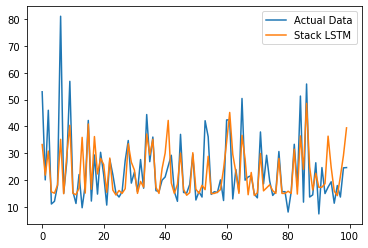

In [55]:
plt.plot(y_test[0:100], label= "Actual Data")
plt.plot(prediction_result_stack[0:100], label="Stack LSTM")
plt.legend()
plt.show()

In [52]:
"""prediction_result = model.predict(X_test)"""

'prediction_result = model.predict(X_test)'

In [53]:
for i in range(10):
  print(f"Prediction: {prediction_result_stack[i]} Actual Ans: {y_test[i]}")

Prediction: [33.198082] Actual Ans: 52.9
Prediction: [21.788681] Actual Ans: 20.0
Prediction: [30.769682] Actual Ans: 46.0
Prediction: [15.525146] Actual Ans: 11.0
Prediction: [15.033403] Actual Ans: 12.0
Prediction: [18.140076] Actual Ans: 17.9
Prediction: [35.139824] Actual Ans: 81.1
Prediction: [14.834356] Actual Ans: 15.0
Prediction: [29.16824] Actual Ans: 26.7
Prediction: [40.383476] Actual Ans: 56.8


In [54]:
"""import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

mae = metrics.mean_absolute_error(y_test, prediction_result)
rms = mean_squared_error(y_test, prediction_result, squared=False)
mse = mean_squared_error(y_test, prediction_result)
r2 = metrics.r2_score(y_test, prediction_result)

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"RMSE:{rms}")
print(f"R-Squared:{r2}")"""

'import sklearn.metrics as metrics\nfrom sklearn.metrics import mean_squared_error\n\nmae = metrics.mean_absolute_error(y_test, prediction_result)\nrms = mean_squared_error(y_test, prediction_result, squared=False)\nmse = mean_squared_error(y_test, prediction_result)\nr2 = metrics.r2_score(y_test, prediction_result)\n\nprint(f"MAE:{mae}")\nprint(f"MSE:{mse}")\nprint(f"RMSE:{rms}")\nprint(f"R-Squared:{r2}")'